In [2]:
# Upload the File

from google.colab import files
uploaded = files.upload()


Saving house_price.csv to house_price.csv


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import mutual_info_regression
from sklearn.feature_selection import SelectKBest



# Define the Dataset

df = pd.read_csv('house_price.csv')
print(df.head())
print("\nShape :", df.shape)



# Check the Dataset

Info = df.info()
print("\n",Info)


# Decribe the dataset

Decribe = df.describe()
print("\n",Decribe)


   Id  MSSubClass MSZoning  ...  SaleType  SaleCondition SalePrice
0   1          60       RL  ...        WD         Normal    208500
1   2          20       RL  ...        WD         Normal    181500
2   3          60       RL  ...        WD         Normal    223500
3   4          70       RL  ...        WD        Abnorml    140000
4   5          60       RL  ...        WD         Normal    250000

[5 rows x 81 columns]

Shape : (1460, 81)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   Lan

In [4]:
# Check the Null values

Null = df.isnull().sum()
print(Null)


Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64


In [6]:
# Take only Numerical column

numeric_lst=['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

numerical_cols = list(df.select_dtypes(include=numeric_lst).columns)

numerical_cols


['Id',
 'MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'SalePrice']

In [8]:
# Apply to the Dataset

df = df[numerical_cols]
df = df.drop("Id", axis=1)

df.head()


,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008,208500
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,0,5,2007,181500
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,0,0,9,2008,223500
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1998.0,3,642,0,35,272,0,0,0,0,2,2006,140000
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000.0,3,836,192,84,0,0,0,0,0,12,2008,250000


#### It is always a good practice to split train and test data to avoid overfitting.

In [11]:
# initialize the Variables

X = df.drop("SalePrice", axis=1)
y = df["SalePrice"]


# Split the dataset into Train & test data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print("Shape of X_train :", X_train.shape)
print("Shape of X_test :", X_test.shape)
print("Shape of y_train :", y_train.shape)
print("Shape of y_test :", y_test.shape)


Shape of X_train : (1022, 36)
Shape of X_test : (438, 36)
Shape of y_train : (1022,)
Shape of y_test : (438,)


In [12]:
# Check for Null

Null = df.isnull().sum()
print(Null)


MSSubClass         0
LotFrontage      259
LotArea            0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
MasVnrArea         8
BsmtFinSF1         0
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       0
BsmtHalfBath       0
FullBath           0
HalfBath           0
BedroomAbvGr       0
KitchenAbvGr       0
TotRmsAbvGrd       0
Fireplaces         0
GarageYrBlt       81
GarageCars         0
GarageArea         0
WoodDeckSF         0
OpenPorchSF        0
EnclosedPorch      0
3SsnPorch          0
ScreenPorch        0
PoolArea           0
MiscVal            0
MoSold             0
YrSold             0
SalePrice          0
dtype: int64


In [13]:
# Find the Mutual Information

mi = mutual_info_regression(X_train.fillna(0), y_train)

mi = pd.Series(mi)
mi.index = X_train.columns
mi.sort_values(ascending=False)


,0
OverallQual,0.531707
GrLivArea,0.450716
GarageCars,0.371264
GarageArea,0.343994
YearBuilt,0.317328
TotalBsmtSF,0.314501
MSSubClass,0.290100
1stFlrSF,0.287591
GarageYrBlt,0.266532
YearRemodAdd,0.256375


<Axes: >

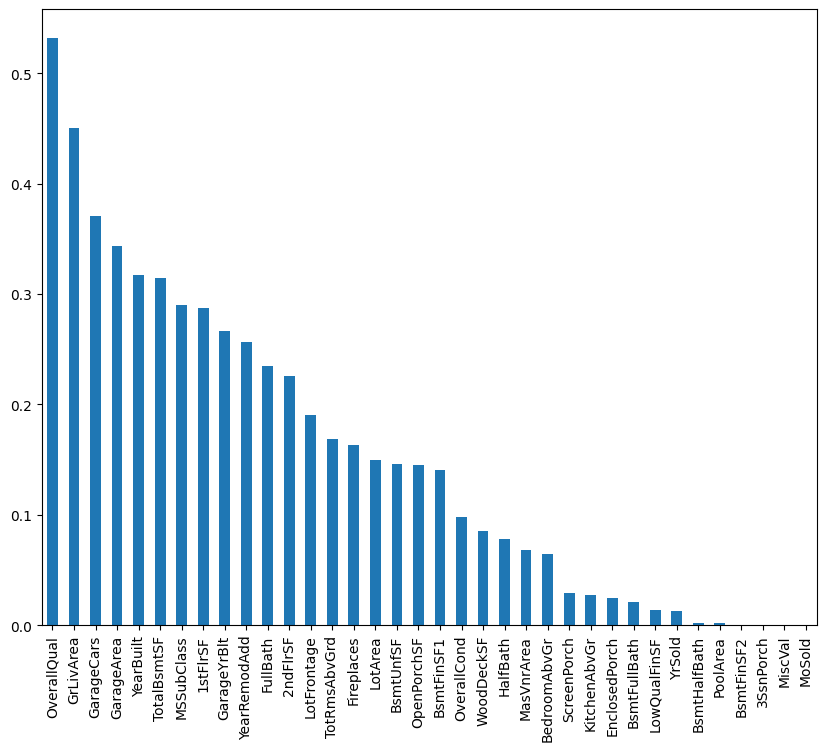

In [14]:
# Plot the Mutual Information

mi.sort_values(ascending=False).plot.bar(figsize=(10, 8))


### SelectKBest

In [18]:
# Pick the Top 8 Features

best_features = SelectKBest(mutual_info_regression, k=8)
X_train_mi = best_features.fit(X_train.fillna(0), y_train)

X_train.columns[X_train_mi.get_support()]


Index(['MSSubClass', 'OverallQual', 'YearBuilt', 'TotalBsmtSF', '1stFlrSF',
       'GrLivArea', 'GarageCars', 'GarageArea'],
      dtype='object')

### Percentile

In [20]:
from sklearn.feature_selection import SelectPercentile

# Pick the Top 10 Features

best_features = SelectPercentile(mutual_info_regression, percentile=10)
X_train_mi = best_features.fit(X_train.fillna(0), y_train)

X_train.columns[X_train_mi.get_support()]


Index(['OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea'], dtype='object')